![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Raffaele Perini

# Exercise - The Titanic Dataset

In this exercise we are going to put in practice what we have learnt in the notebooks of the session. 

Answer directly in your copy of the exercise and submit it as a moodle task.

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline

# Reading Data

Assign the variable *df* a Dataframe with the Titanic Dataset from the URL https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"

Print *df*.

In [3]:
import pandas as pd
#We get a URL with raw content (not HTML one)
url = "https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Munging and Exploratory visualisation

Obtain number of passengers and features of the dataset

In [4]:
df.shape

(891, 12)

Obtain general statistics (count, mean, std, min, max, 25%, 50%, 75%) about the column Age

In [5]:

df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Obtain the median of the age of the passengers

In [6]:
df['Age'].median()

28.0

Obtain number of missing values per feature

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many passsengers have survived? List them grouped by Sex and Pclass.

Assign the result to a variable df_1 and print it

In [8]:
df_1 = df[df.Survived == 1].groupby(['Sex','Pclass'])['Survived'].count()
print(df_1)

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64


Visualise df_1 as an histogram.

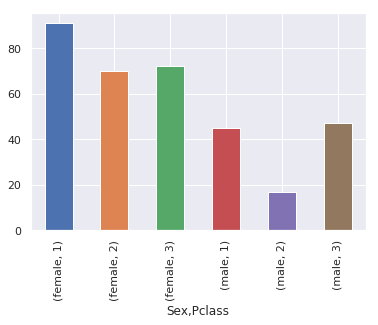

In [9]:
 df_1.plot(kind='bar')

# Feature Engineering

Here you can find some features that have been proposed for this dataset. Your task is to analyse them and provide some insights. 

Use pandas and visualisation to justify your conclusions

## Feature FamilySize 

Regarding SbSp and Parch, we can define a new feature, 'FamilySize' that is the combination of both.

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### *myedit*
visulize the family size distribution and the mean


0.904601571268


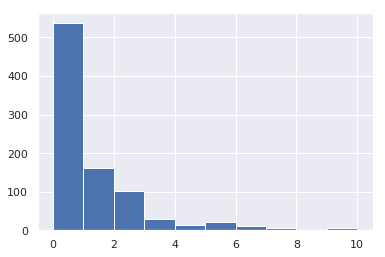

In [11]:
df['FamilySize'].hist()
print(df['FamilySize'].mean())

It is possible to notice that many of the passegers were alone

## Feature Alone

It seems many people who went alone survived. We can define a new feature 'Alone'

In [12]:
df['Alone'] = (df.FamilySize == 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


#### *myedit*
let's see the difference between the two


Alone  Survived
False  0           175
       1           179
True   0           374
       1           163
Name: Survived, dtype: int64


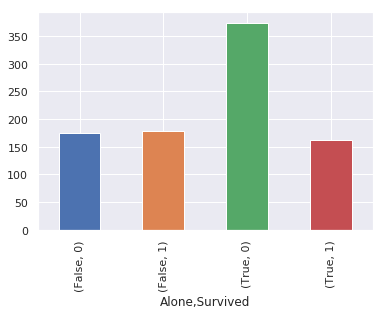

In [13]:
gg = df.groupby(['Alone','Survived'])['Survived'].count()
print(gg)
gg.plot(kind='bar')

> "It seems many people who went alone survived. We can define a new feature 'Alone'"

It seems like this sentece is not verify by this graph, in fact the most alone ones are dead

We can see the probability ratio considering the family size

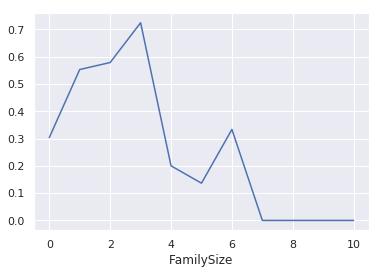

In [62]:
df.groupby('FamilySize').Survived.mean().plot()

We noticed that 3 has the most probability survived ratio.

## Feature Salutation

If we observe well in the name variable, there is a 'title' (Mr., Miss., Mrs.). We can add a feature wit this title.

In [14]:
#Taken from http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

df['Salutation'] = df['Name'].apply(name_extract)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Mr


We can list the different salutations.

In [15]:
df['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
df.groupby(['Salutation']).size()

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

There only 4 main salutations, so we combine the rest of salutations in 'Others'.

In [17]:
def group_salutation(old_salutation):
    if old_salutation == 'Mr':
        return('Mr')
    else:
        if old_salutation == 'Mrs':
            return('Mrs')
        else:
            if old_salutation == 'Master':
                return('Master')
            else: 
                if old_salutation == 'Miss':
                    return('Miss')
                else:
                    return('Others')
df['Salutation'] = df['Salutation'].apply(group_salutation)
df.groupby(['Salutation']).size()

Salutation
Master     40
Miss      182
Mr        517
Mrs       125
Others     27
dtype: int64

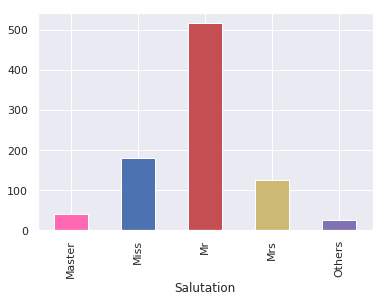

In [18]:
# Distribution
colors_sex = ['#ff69b4', 'b', 'r', 'y', 'm', 'c']
df.groupby('Salutation').size().plot(kind='bar', color=colors_sex)

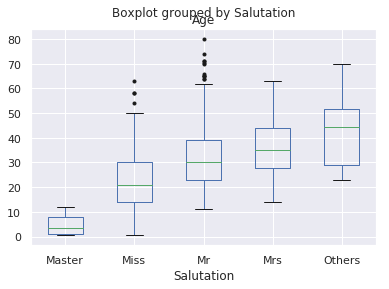

In [19]:
df.boxplot(column='Age', by = 'Salutation', sym='k.')

#### *myedit*
The graphs above showed the distribution, we can notice that Mr is the trend and they are mostly middle-age men.

We can compare the salutation feature with the family feature.
We are going to see the distrution of the dead taking into consideration the salutation and the family feature.

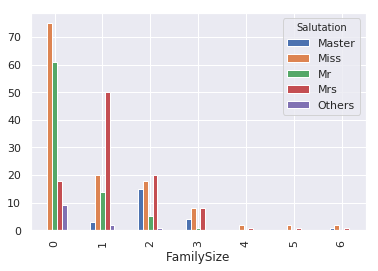

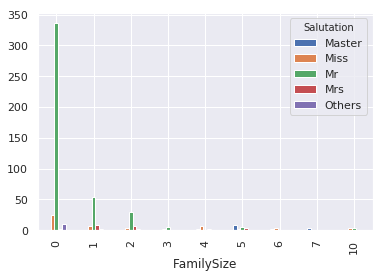

In [20]:

df.query('Survived == 1').groupby(['Salutation','FamilySize']).size().unstack(['Salutation']).plot(kind='bar')
df.query('Survived == 0').groupby(['Salutation','FamilySize']).size().unstack(['Salutation']).plot(kind='bar')


In the graph above we can notice that women survived the most, regardless of their salutation, and most of the dead were alone men.

## Features Children and Female

In [21]:
# Specific features for Children and Female since there are more survivors
df['Children']   = df['Age'].map(lambda x: 1 if x < 6.0 else 0)
df['Female']     = df['Sex'].map(lambda x: 1 if x == "female" else 0)

 #### *myedit*
Let's see the survived distribution of Children and women

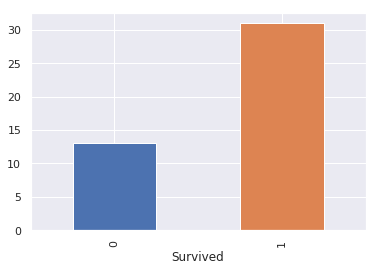

In [22]:
df.query("Children == 1").groupby(['Survived']).size().plot(kind='bar')

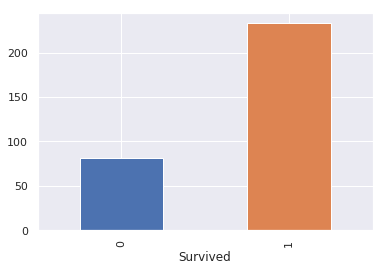

In [23]:
df.query("Female == 1").groupby(['Survived']).size().plot(kind='bar')

In both cases the majority survived, and there were fewer children compare with women.

## Feature AgeGroup

In [24]:
# Group ages to simplify machine learning algorithms.  0: 0-5, 1: 6-10, 2: 11-15, 3: 16-59 and 4: 60-80
df['AgeGroup'] = 0
df.loc[(df.Age<6),'AgeGroup'] = 0
df.loc[(df.Age>=6) & (df.Age < 11),'AgeGroup'] = 1
df.loc[(df.Age>=11) & (df.Age < 16),'AgeGroup'] = 2
df.loc[(df.Age>=16) & (df.Age < 60),'AgeGroup'] = 3
df.loc[(df.Age>=60),'AgeGroup'] = 4

#### myedit
We can analysed what is the mean taking into account the age class

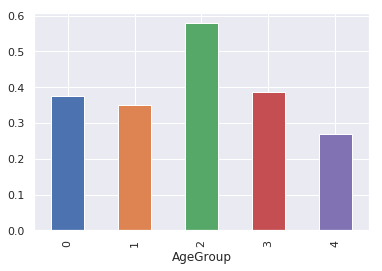

In [25]:
df.groupby(['AgeGroup']).Survived.mean().plot(kind='bar')

we can notice that on average only the people between 11-16 years survived more than 50%

## Feature Deck
Only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck.

In [72]:
def substrings_in_string(big_string, substrings):
    if type(big_string) == float:
        if np.isnan(big_string):
            return 'X'
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return 'X'
 
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Alone,Salutation,Children,Female,AgeGroup,Deck,FarePerPerson,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,False,Mr,0,0,3,X,3.625000,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,False,Mrs,0,1,3,C,35.641650,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,True,Miss,0,1,3,X,7.925000,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,False,Mrs,0,1,3,C,26.550000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,True,Mr,0,0,3,X,8.050000,105.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,0,True,Mr,0,0,0,X,8.458300,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,0,True,Mr,0,0,3,E,51.862500,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,4,False,Master,1,0,0,X,4.215000,6.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,2,False,Mrs,0,1,3,X,3.711100,81.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,1,False,Mrs,0,1,2,X,15.035400,28.0


#### myedit


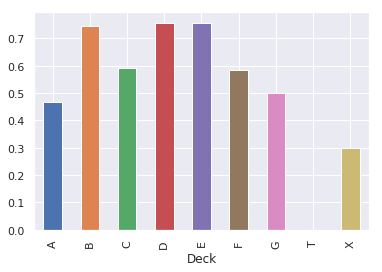

In [73]:
df.groupby(['Deck']).Survived.mean().plot(kind='bar')

> "Only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck."

It seems even this sentence is not true

## Feature FarePerPerson

This feature is created from two previous features: Fare and FamilySize.

In [51]:
df['FarePerPerson']= df['Fare'] / (df['FamilySize'] + 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Salutation,Children,Female,AgeGroup,Deck,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Mr,0,0,3,X,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Mrs,0,1,3,A,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Miss,0,1,3,X,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,Mrs,0,1,3,A,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Mr,0,0,3,X,8.05000


#### myedit
We can try to compare fares with the survived ratio


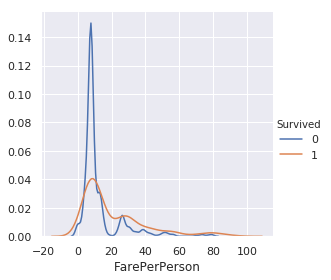

In [67]:
gg = df.query("FarePerPerson < 100")
sns.FacetGrid(gg, hue="Survived", height=4).map(sns.kdeplot, "FarePerPerson").add_legend()

Here fares around 10 have more death than survived

## Feature AgeClass

Since age and class are both numbers we can just multiply them and get a new feature.


In [68]:
df['AgeClass']=df['Age']*df['Pclass']

#### 

### df['AgeClass'].hist()

# Conclusion

In this notebook many features have been analysed, and it has been possible to understanf how these different analysis bring to different results and even more different point of views.

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© 2016 Carlos A. Iglesias, Universidad Politécnica de Madrid.